# **Task 1 :** The goal of this project is to build a prediction model that predicts weather a passenger on the Titatic survived or not

# **Dataset :**
The Titanic dataset has following variables:

PassengerID : ID of the Passenger.

*   PassengerID : ID of the Passenger.
*   Survived: Survival (0 = No; 1 = Yes)
*   Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
*   Name : Name of the Passenger
*   Sex: Sex of the Passenger (Female / Male)
*   Age: Age of the Passenger.
*   Sibsp: Number of siblings/spouses aboard
*   Parch: Number of parents/children aboard
*   Ticket : Ticket number.
*   Fare: Passenger fare (British pound)
*   Cabin: Cabin number
*   Embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)








# **Project Roadmap**


*   Import libraries and dataset
*   Exploratory data analysis
*   Model construction and evaluation
*   Summary

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#reading the data and only first five columns
df = pd.read_csv('/content/tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df.shape

(418, 12)



*   we have 418 rows and 12 columns lets us know the data in more descriptive way.



In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# **Exploratery Data Analysis**

In [6]:
#missing data
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Since we have missing values in the data set which is in age and cabin so we need to fill it so that our predisction is more accurate.

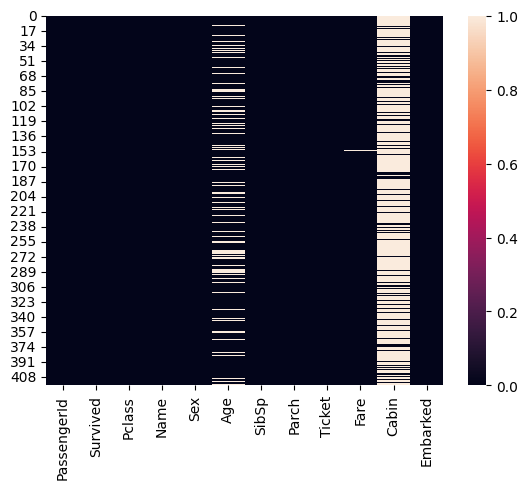

In [7]:
# Visualize missing data
sns.heatmap(df.isnull());

<ipython-input-8-f6412ee67fb3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


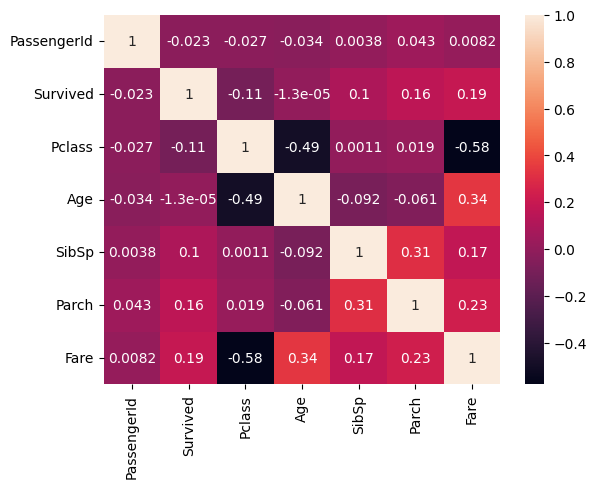

In [8]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [9]:
# Deal with missing data
df['Age'].replace(np.nan, df['Age'].mean(), inplace=True)
df['Fare'].replace(np.nan, df['Fare'].mean(), inplace=True)
df.drop('Cabin', axis=1,inplace=True)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

we have now filled all the missing values of age, fare with mean and and dropped the cabin which we felt its not worth it.

In [10]:
#checking for unique values
df.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             80
SibSp            7
Parch            8
Ticket         363
Fare           170
Embarked         3
dtype: int64

In [11]:
# Let's make seperate list of categorical and numerical variables

cat_var = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
num_var = ['Age', 'Fare']

Now you must be thinking how we can seperate categorical and numerical variables so basically categorical variables are those which are divided into categories and are less , and numerical varaiable are those which int type data.

In [12]:
round(df['Survived'].value_counts(normalize=True)*100,2)

0    63.64
1    36.36
Name: Survived, dtype: float64

**We have 36.36% of passengers who survived and 63.64% of passengers who did'nt survived and lets check the accuracy of data by diving into it more deeply.**

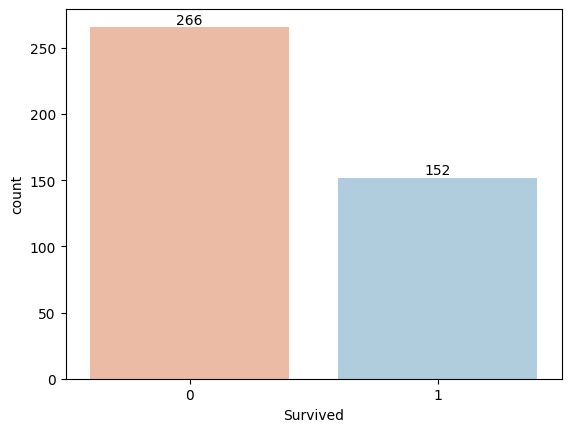

In [13]:
chart =sns.countplot(x=df['Survived'], palette='RdBu')
chart.bar_label(chart.containers[0])
plt.show()

Above chart shows that 266 persons not survived and 152 were survived. Now lets make it more clear by just knowing where survival depend on what things age,pclass and all.

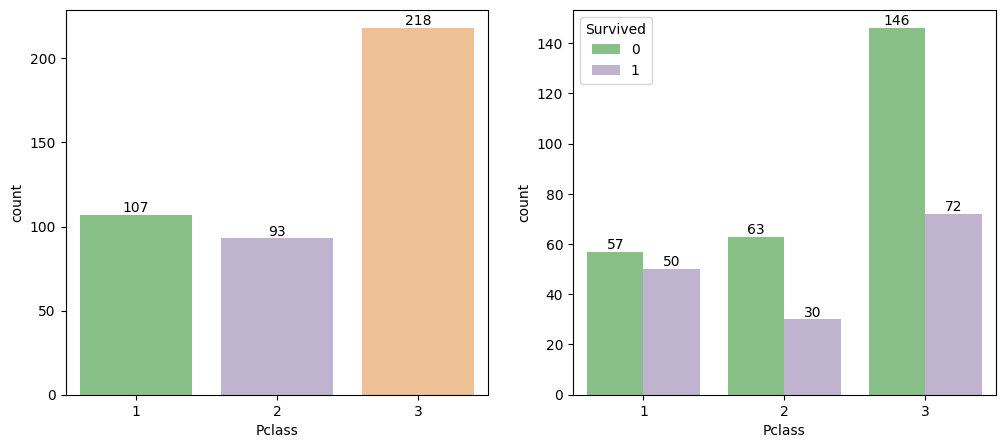

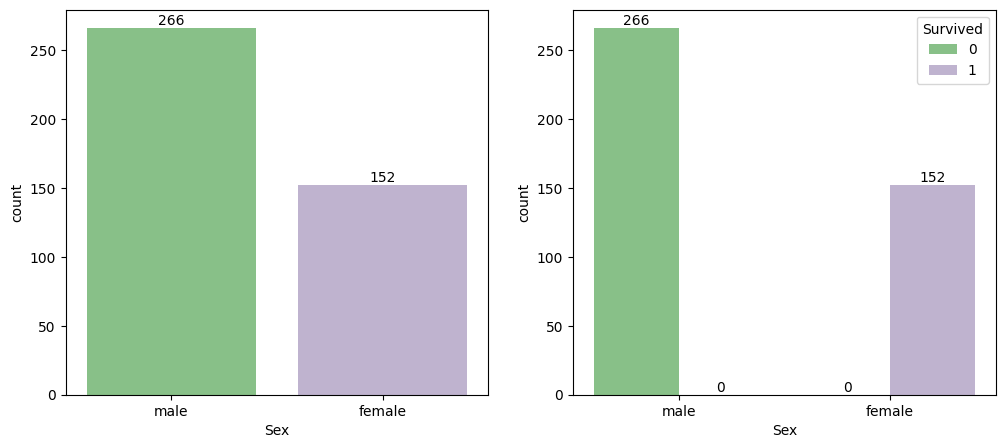

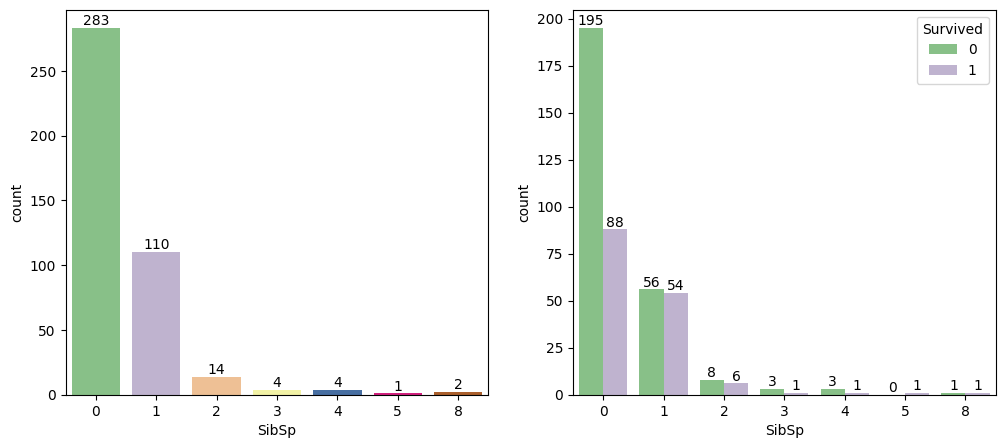

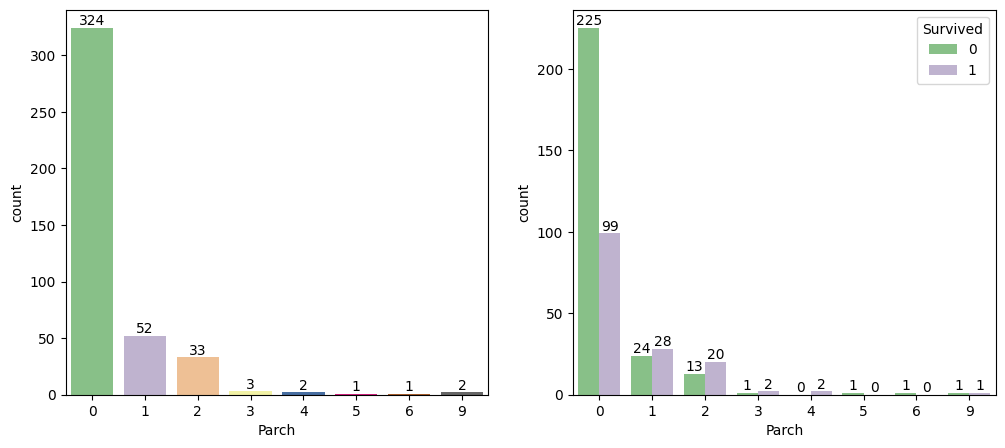

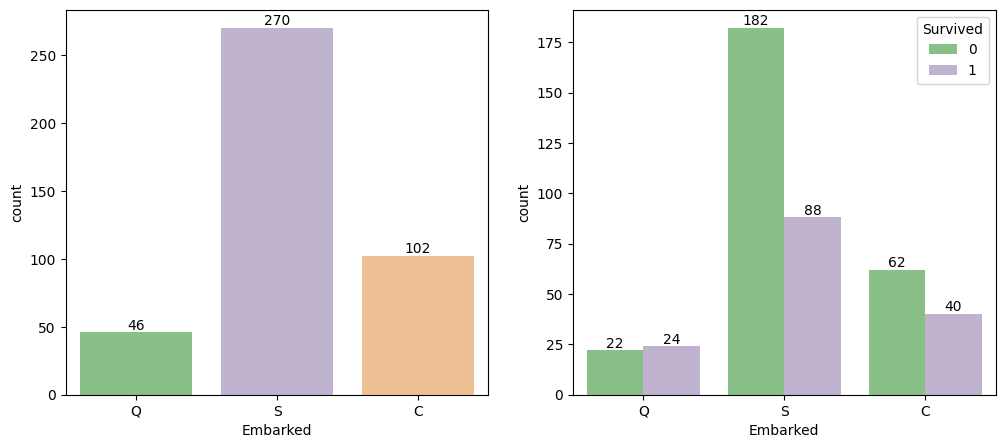

In [14]:
for column in cat_var:
  plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  chart =sns.countplot(x=column,data = df, palette='Accent')
  chart.bar_label(chart.containers[0])

  plt.subplot(1,2,2)
  chart = sns.countplot(x=column, data=df, hue='Survived', palette='Accent')
  chart.bar_label(chart.containers[0])
  chart.bar_label(chart.containers[1])
  plt.show()



*   The first column shows the number of passengers not survived are high in class 3rd and 2nd class peoples.
*   The males where the victicms of the disaster who did'nt survived and females were survived.
*   Single passengers with no siblings/spouses aboard have less chance of survival.
*   Single passengers with no parents/children aboard with them have less chance of survival.
*   The last column shows that the passngers who embarked from Queenstown have good chance of survival and the passngers who embarked from Southampton have less chance of survival.





**Now we will be working on with numerical**

In [15]:
df[num_var].describe()

,Age,Fare
count,418.000000,418.000000
mean,30.272590,35.627188
std,12.634534,55.840500
min,0.170000,0.000000
25%,23.000000,7.895800
50%,30.272590,14.454200
75%,35.750000,31.500000
max,76.000000,512.329200


**plotting numerical variable**

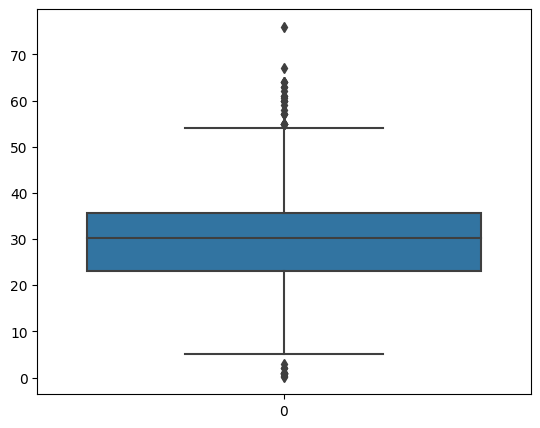

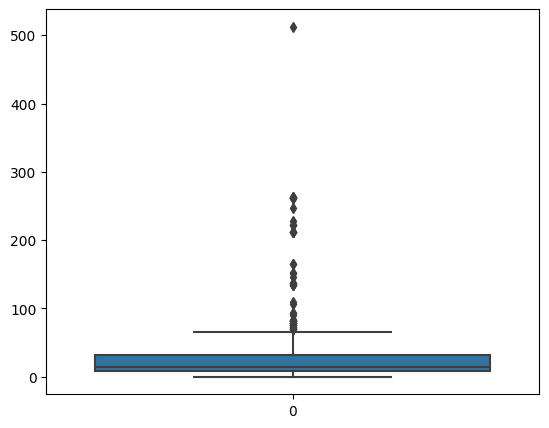

In [16]:
for column in num_var:
  plt.figure(figsize=(14,5))
  plt.subplot(1,2,1)
  plot=sns.boxplot(df[column])

Since  numerical column had 2 values age and fare so we can find here are some outliers i the 'Age' variable which can effect a lot in prediction so we need to remove it we have diffenrt methods of removing like percentile method.

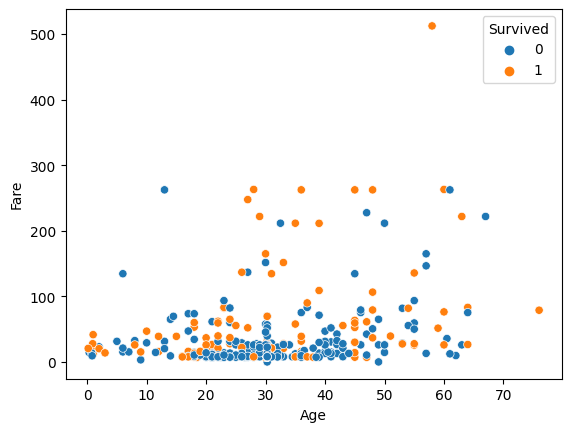

In [17]:
sns.scatterplot(data=df,x='Age',y='Fare',hue='Survived')
plt.show()

person with higher fare has chances for survival.

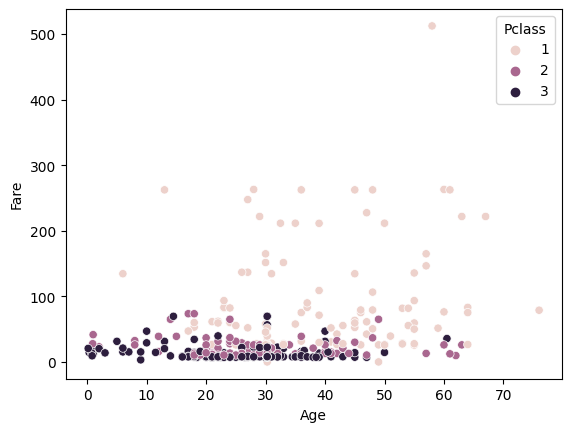

In [18]:
sns.scatterplot(data=df, x='Age', y='Fare', hue='Pclass')
plt.show()

passenger of 1st class has less chances of survival

In [19]:
#dropping extra columns which are of no use .
df_new = df.drop(['PassengerId','Name', 'Ticket'], axis=1)
df_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [20]:
df_new.shape

(418, 8)

# **Handling Categorical Vlaues**

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
df_new['Sex']=le.fit_transform(df_new['Sex'])
df_new['Embarked']=le.fit_transform(df_new['Embarked'])
df_new.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2
5,0,3,1,14.0,0,0,9.2250,2
6,1,3,0,30.0,0,0,7.6292,1
7,0,2,1,26.0,1,1,29.0000,2
8,1,3,0,18.0,0,0,7.2292,0
9,0,3,1,21.0,2,0,24.1500,2


In [23]:
X = df_new.drop('Survived', axis=1)
y = df_new['Survived']
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [24]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=0)


In [25]:
X_train.shape

(334, 7)

In [26]:
y_test.shape

(84,)

# **Supervised ML algorithms**

# Logistic Regression

In [27]:
#feature scaling to avoid outliers
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)

In [28]:
X_train

array([[-1.49835483,  0.71506099,  1.86053764, ..., -0.40021756,
         0.42648044, -1.65501353],
       [-1.49835483,  0.71506099, -0.02964204, ...,  1.52313013,
         2.04947356,  0.70223389],
       [-1.49835483,  0.71506099,  2.31418076, ...,  2.48480397,
         4.00138038, -1.65501353],
       ...,
       [ 0.8622608 , -1.39848211, -2.22225047, ...,  0.56145629,
        -0.32557389,  0.70223389],
       [ 0.8622608 ,  0.71506099, -0.00903225, ..., -0.40021756,
        -0.48320589, -0.47638982],
       [ 0.8622608 ,  0.71506099, -0.55889235, ..., -0.40021756,
        -0.37488893,  0.70223389]])

In [29]:
#making it into 2D array
p = np.array([1,2,5,6,7,8,10,20])
p = p.reshape(4,2)

In [30]:
q = sc.fit_transform(p)
q

array([[-1.45296631, -1.04349839],
       [-0.22941573, -0.4472136 ],
       [ 0.38235956, -0.1490712 ],
       [ 1.30002249,  1.63978318]])

In [31]:
#building model
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [32]:
#predicting
logpred = log.predict(X_test)
logpred

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0])

In [33]:
#calculating accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,logpred)


In [34]:
accuracy

1.0

We got 100% of accuracy which is a good one

In [35]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,logpred)
cm

array([[45,  0],
       [ 0, 39]])

Getting 0,0 that is true predictions

In [36]:
#auc and roc
import sklearn.metrics as metrics
fpr,tpr,threshold = metrics.roc_curve(y_test,logpred)
roc_auc=metrics.auc(fpr,tpr)
roc_auc


1.0

Since we got 1 that means it is the best model and also our predictions are also correct

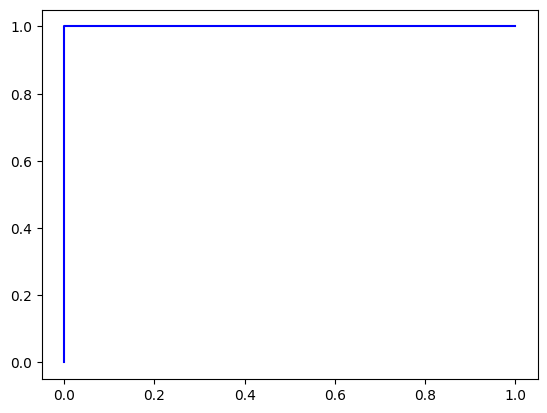

In [37]:
#plotting
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'%roc_auc)
plt.show()

Its a good model

 **The logistic Regression has 100% accuracy**

# **K-nearest neighbour**

In [38]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors=6)
Knn.fit(X_train,y_train)
ypred = Knn.predict(X_test)
ypred

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0])

In [39]:
y_test

360    0
170    0
224    1
358    0
309    1
      ..
100    1
7      0
22     1
68     0
328    0
Name: Survived, Length: 84, dtype: int64

In [40]:
#testing accuracy
from sklearn.metrics import accuracy_score,multilabel_confusion_matrix
accuracy = accuracy_score(ypred,y_test)
accuracy

0.9642857142857143

Accuracy of 98% which is a good one means a model is perfect but lets check it with some random samples

In [41]:
cm=confusion_matrix(ypred,y_test)
cm

array([[45,  3],
       [ 0, 36]])

In [42]:
df_new.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2


In [43]:
yp = Knn.predict([[2,0,41,0,0,7.0809,0]])
yp

array([0])

In [44]:
yp = Knn.predict([[3,0,47.0,1,0,7.0000,2]])
yp

array([0])

**KNN is not predicting correctly its giving wrong answers when tested with different samples so Knn would not work.**

# **Decisiion Tree Classification**

In [45]:
#decision tree model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = "entropy",random_state =0)
dt.fit(X_train,y_train)
dtpred=dt.predict(X_test)
dtpred


array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0])

In [46]:
y_test

360    0
170    0
224    1
358    0
309    1
      ..
100    1
7      0
22     1
68     0
328    0
Name: Survived, Length: 84, dtype: int64

In [47]:
#checking accuracy
from sklearn.metrics import accuracy_score,confusion_matrix
dtaccuracy = accuracy_score(y_test,dtpred)
dtcm = confusion_matrix(y_test,dtpred)
print(dtaccuracy)


1.0


Getting 1 is getting 100% of acurracy

In [48]:
print(dtcm)

[[45  0]
 [ 0 39]]


We got (0,0) which means model has passed all the test samples correctly  and is a good model.

In [49]:
#aoc and roc curve
import sklearn.metrics as metrics
dtfpr , dttpr , dtthreshold=metrics.roc_curve(y_test,dtpred)
dtroc_auc = metrics.auc(dtfpr,dttpr)
dtroc_auc

1.0

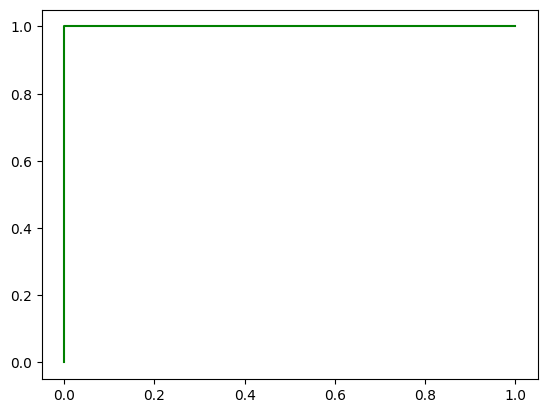

In [51]:
#plotting
import matplotlib.pyplot as plt
plt.plot(dtfpr,dttpr,'g',label='avuc = %0.2f'%dtroc_auc)

According To the curve decision is a good model.

# **Conclusion**

*   We have 36.36% of passengers who survived and 63.64% of passengers who did'nt survived and lets check the accuracy of data by diving into it more deeply.
*   The number of passengers not survived are high in class 3rd and 2nd class peoples.
*   The males where the victicms of the disaster who did'nt survived and females were survived.
*   Single passengers with no siblings/spouses aboard have less chance of survival.
*   Single passengers with no parents/children aboard with them have less chance of survival.
*   The passngers who embarked from Queenstown have good chance of survival and the passngers who embarked from Southampton have less chance of survival.
*   Decision tree and logistic regression models gave us 100% accuracy
resulting in correct prediction assurance.



